In [1]:
from utils import *

In [6]:
def pre(path):
    img1 = cv2.imread(path)
    img_hsv=cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

    H=img_hsv[:,:,0]
    S=img_hsv[:,:,1]
    V=img_hsv[:,:,2]


    #Equalize S
    img_HSV_eq=np.copy(img_hsv)
    img_HSV_eq[:,:,1]=cv2.equalizeHist(img_HSV_eq[:,:,1])


    show_images([cv2.cvtColor(img1, cv2.COLOR_BGR2RGB),H,S,V,cv2.cvtColor(img_HSV_eq, cv2.COLOR_HSV2RGB)],['Original','h','S','V','Equalize S'])



###########################################Hand Masks###############################################################

    # Segmentation
    # Defining HSV Threadholds
    lower_threshold = np.array([0, 100, 80], dtype=np.uint8)
    upper_threshold = np.array([20, 255, 255], dtype=np.uint8)

    # Single Channel mask,denoting presence of colours in the about threshold
    skinMask_b = cv2.inRange(img_HSV_eq, lower_threshold, upper_threshold)

    # Cleaning up mask using Gaussian Filter
    skinMask = cv2.GaussianBlur(skinMask_b, (3, 3), 0)

    # # Apply Closing =(Erode+Dilate) to remove 
    kernel = np.ones((10, 10), np.uint8)
    skinMask = cv2.morphologyEx(skinMask, cv2.MORPH_ERODE, kernel, iterations=2) #erode
    skinMask = cv2.morphologyEx(skinMask, cv2.MORPH_DILATE, kernel, iterations=2) #Dilate Back  



    # cv2.imwrite('hand.jpg',cv2.cvtColor(img_HSV_eq, cv2.COLOR_HSV2BGR))


    show_images([skinMask],['skinMask'])

    #Draw Contours

    debug=True
    name=path

    # Find Contours
    contours, hierarchy = cv2.findContours(
        skinMask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

    # Draw for debug
    if (debug):
        img_contours = np.copy(img1)
        cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 3)

    # Get Largest Contour
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    largest_contour = sorted_contours[0]
    if (debug):
        largest_contour_img = np.copy(img1)
        cv2.drawContours(largest_contour_img,
                         largest_contour, -1, (255, 0, 0), 10)

    # Binary_img_contours[Result]
    hand_contour = np.zeros((np.shape(img1)[0], np.shape(img1)[1], 1))
    cv2.drawContours(hand_contour, largest_contour, -1, 255, 10)

    if (debug):
        show_images([cv2.cvtColor(img1, cv2.COLOR_BGR2RGB),
                     img_contours, largest_contour_img, hand_contour],
                    ['RGB'+name, 'Contours', 'Largest Contour', 'hand_contour'])

    
    return None

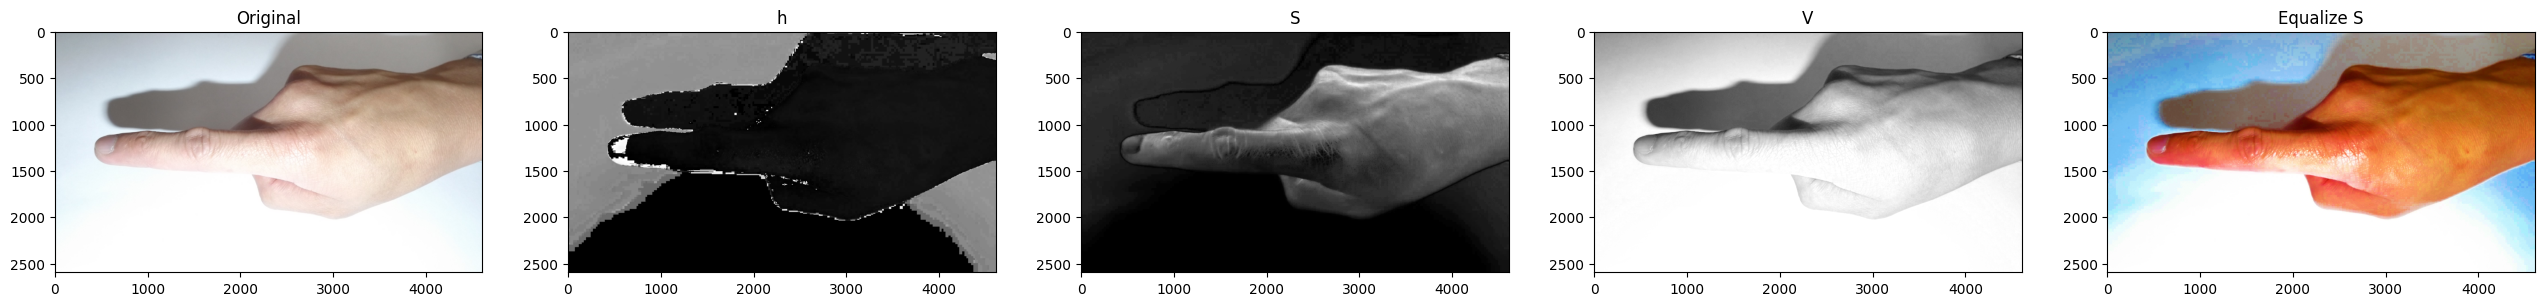

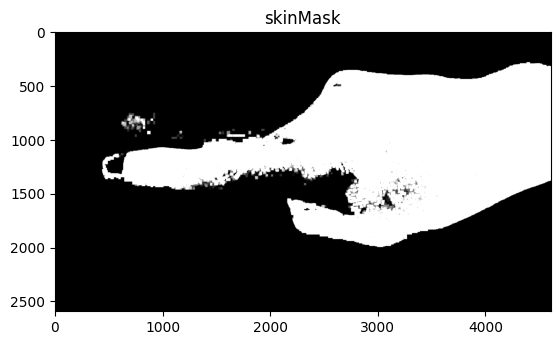

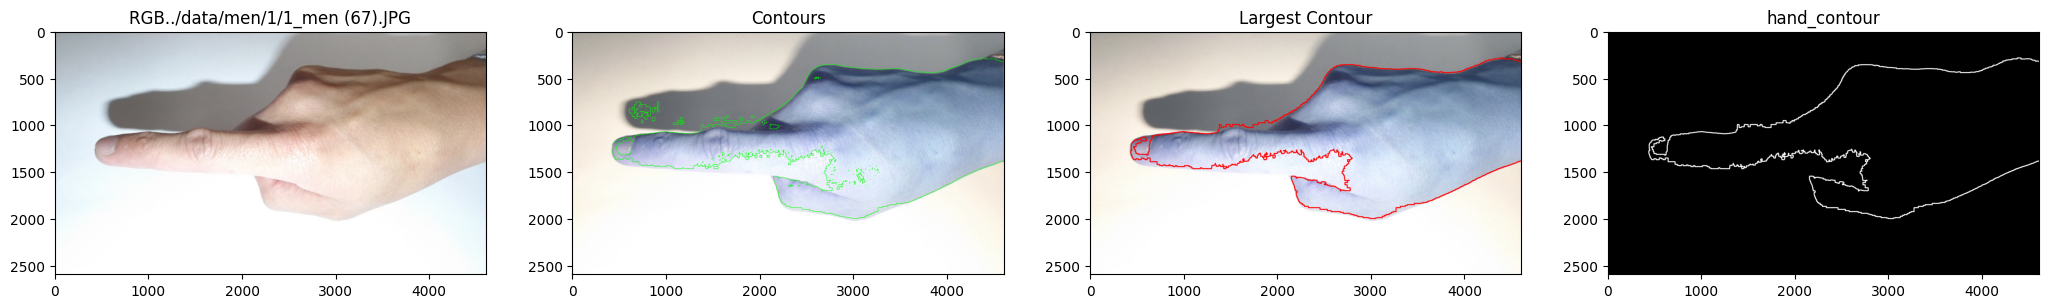

In [7]:
pre('../data/men/1/1_men (67).JPG')